#  Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Train and Test Data 

In [2]:
train_submissions=pd.read_csv("train_submissions.csv")
print(train_submissions.shape)
train_submissions.sample(5)

(155295, 3)


,user_id,problem_id,attempts_range
96406,user_2600,prob_1856,1
38426,user_661,prob_2321,1
50220,user_2893,prob_5187,1
91172,user_3019,prob_3938,1
122213,user_552,prob_5187,1


In [3]:
test_submission=pd.read_csv("test_submissions_NeDLEvX.csv")
print(test_submission.shape)
test_submission.sample(5)

(66555, 3)


,ID,user_id,problem_id
4437,user_3513_prob_2602,user_3513,prob_2602
14124,user_65_prob_4578,user_65,prob_4578
36634,user_977_prob_1218,user_977,prob_1218
40911,user_211_prob_1447,user_211,prob_1447
33971,user_2034_prob_5518,user_2034,prob_5518


# Importing User and Problem Data

In [4]:
user_data=pd.read_csv("user_data.csv")
print(user_data.shape)
user_data.head()

(3571, 11)


,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498


In [5]:
problem_data=pd.read_csv("problem_data.csv")
print(problem_data.shape)
problem_data.sample(5)

(6544, 4)


,problem_id,level_type,points,tags
4513,prob_4616,C,NaN,"dp,implementation"
1022,prob_714,C,1500.0,sortings
2581,prob_565,E,NaN,NaN
2917,prob_4062,C,NaN,NaN
77,prob_2771,C,1500.0,implementation


# Merging data to get meaningful insights

In [6]:
train_data = train_submissions.merge(user_data,on="user_id",how='left').merge(problem_data,on='problem_id',how='left')
train_data

,user_id,problem_id,attempts_range,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,level_type,points,tags
0,user_232,prob_6507,1,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935,B,1000.0,strings
1,user_3568,prob_2994,3,133,118,0,NaN,0,1502200122,324.255,235.378,beginner,1454664414,C,1500.0,"brute force,dp"
2,user_1600,prob_5071,1,50,44,0,NaN,7,1504719542,343.177,229.358,beginner,1473490873,A,500.0,implementation
3,user_2256,prob_703,1,271,233,23,Indonesia,40,1505175115,436.927,399.083,intermediate,1447736644,A,500.0,"brute force,implementation"
4,user_2321,prob_356,1,155,135,0,India,80,1505421849,492.546,472.190,advanced,1437724657,D,2000.0,"dfs and similar,trees"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155290,user_2959,prob_2052,1,226,200,0,India,17,1505584042,360.378,329.415,intermediate,1469909800,A,500.0,math
155291,user_2530,prob_6167,6,583,519,-17,Bangladesh,70,1505517523,327.122,286.411,beginner,1446655021,E,2500.0,data structures
155292,user_445,prob_3110,1,138,117,0,India,13,1504944103,318.807,252.007,beginner,1470375263,C,1500.0,dfs and similar
155293,user_2337,prob_2685,2,185,148,0,NaN,1,1486101965,317.661,259.748,beginner,1449598352,B,1000.0,"constructive algorithms,dp,greedy,implementation"


In [7]:
test_data=test_submission.merge(user_data,on="user_id",how='left').merge(problem_data,on='problem_id',how='left')
test_data

,ID,user_id,problem_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,level_type,points,tags
0,user_856_prob_5822,user_856,prob_5822,274,231,0,India,35,1503233908,393.062,362.959,intermediate,1422163139,L,NaN,NaN
1,user_2642_prob_2334,user_2642,prob_2334,124,114,0,India,8,1505566590,307.053,146.502,beginner,1439989756,A,500.0,"brute force,implementation"
2,user_2557_prob_2920,user_2557,prob_2920,367,283,0,Bangladesh,76,1505585750,321.674,241.399,beginner,1396166615,A,500.0,"brute force,implementation"
3,user_1572_prob_4598,user_1572,prob_4598,203,181,0,NaN,29,1503308582,473.050,454.989,intermediate,1421921832,B,1000.0,"constructive algorithms,dfs and similar,divide..."
4,user_295_prob_6139,user_295,prob_6139,113,89,0,Singapore,3,1494541779,455.275,448.108,intermediate,1454257416,A,500.0,"binary search,dp"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66550,user_1551_prob_2949,user_1551,prob_2949,137,118,0,Bangladesh,8,1505224785,310.493,234.805,beginner,1477986503,A,500.0,brute force
66551,user_2617_prob_6266,user_2617,prob_6266,874,864,1,Hong Kong,26,1505567477,506.594,451.548,intermediate,1453802063,A,500.0,math
66552,user_799_prob_1800,user_799,prob_1800,489,455,2,Poland,26,1505562856,565.654,552.466,advanced,1450107416,E,NaN,dp
66553,user_1265_prob_137,user_1265,prob_137,59,50,0,NaN,5,1500891253,317.947,263.475,beginner,1465900834,B,1000.0,implementation


In [8]:
train_data.iloc[:,2:].duplicated().sum()  

18513

### We can't drop user_id and problem_id column

In [9]:
train=train_data
train['user_id']=train['user_id'].str[5:].astype(int)
train['problem_id']=train['problem_id'].str[5:].astype(int)

In [10]:
test=test_data
test['user_id']=test['user_id'].str[5:].astype(int)
test['problem_id']=test['problem_id'].str[5:].astype(int)

In [11]:
train.head().duplicated().sum()

0

In [12]:
train.nunique()

user_id                      3529
problem_id                   5776
attempts_range                  6
submission_count              936
problem_solved                902
contribution                  138
country                        79
follower_count                297
last_online_time_seconds     3497
max_rating                    946
rating                       1306
rank                            4
registration_time_seconds    3528
level_type                     14
points                         29
tags                          850
dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155295 entries, 0 to 155294
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   user_id                    155295 non-null  int32  
 1   problem_id                 155295 non-null  int32  
 2   attempts_range             155295 non-null  int64  
 3   submission_count           155295 non-null  int64  
 4   problem_solved             155295 non-null  int64  
 5   contribution               155295 non-null  int64  
 6   country                    117442 non-null  object 
 7   follower_count             155295 non-null  int64  
 8   last_online_time_seconds   155295 non-null  int64  
 9   max_rating                 155295 non-null  float64
 10  rating                     155295 non-null  float64
 11  rank                       155295 non-null  object 
 12  registration_time_seconds  155295 non-null  int64  
 13  level_type                 15

# Handling Null Values 

In [14]:
train.isnull().sum()

user_id                          0
problem_id                       0
attempts_range                   0
submission_count                 0
problem_solved                   0
contribution                     0
country                      37853
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
level_type                     620
points                       29075
tags                         15427
dtype: int64

In [15]:
train.isnull().mean()*100

user_id                       0.000000
problem_id                    0.000000
attempts_range                0.000000
submission_count              0.000000
problem_solved                0.000000
contribution                  0.000000
country                      24.374899
follower_count                0.000000
last_online_time_seconds      0.000000
max_rating                    0.000000
rating                        0.000000
rank                          0.000000
registration_time_seconds     0.000000
level_type                    0.399240
points                       18.722432
tags                          9.933997
dtype: float64

# Handling 'level_type' column Null Value

As null values in level_type is less than 5% so we can fill with mode

In [16]:
train['level_type'].mode()


0    A
Name: level_type, dtype: object

In [17]:
train['level_type'].fillna('A',inplace=True)

In [18]:
test['level_type'].fillna('A',inplace=True)

In [19]:
train.isnull().sum()

user_id                          0
problem_id                       0
attempts_range                   0
submission_count                 0
problem_solved                   0
contribution                     0
country                      37853
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
level_type                       0
points                       29075
tags                         15427
dtype: int64

In [20]:
test.isnull().sum()

ID                               0
user_id                          0
problem_id                       0
submission_count                 0
problem_solved                   0
contribution                     0
country                      16162
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
level_type                       0
points                       12484
tags                          6612
dtype: int64

# Handling 'tags' column Null Values

In [21]:
aa=train
aa['tags'].fillna('missing',inplace=True)
aa['tags'].value_counts().sort_values(ascending = False).head(5)

implementation                23275
missing                       15427
brute force,implementation     5171
implementation,math            5096
math                           4710
Name: tags, dtype: int64

### here missing values are very high so that we are filling it with 'missing' as a seperate tag

In [22]:
train['tags'].fillna('missing',inplace=True)

In [23]:
test['tags'].fillna('missing',inplace=True)

In [24]:
train.isnull().sum()

user_id                          0
problem_id                       0
attempts_range                   0
submission_count                 0
problem_solved                   0
contribution                     0
country                      37853
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
level_type                       0
points                       29075
tags                             0
dtype: int64

# Handling 'points' column Null Values

In [25]:
train.groupby('level_type')['points'].count().sum()

126220

### Counting null values corresponding to Level type

In [26]:
temp1=train[train['points'].isna()].groupby('level_type').size()
temp1.sum()

29075

In [27]:
median_points = train.groupby('level_type')['points'].median() #.transform('median')
median_points

level_type
A     500.0
B    1000.0
C    1500.0
D    2000.0
E    2500.0
F    2750.0
G    3000.0
H    1500.0
I       NaN
J       NaN
K       NaN
L       NaN
M       NaN
N       NaN
Name: points, dtype: float64

In [28]:
# Fill missing values in 'points' with the median of each group
median_points = train.groupby('level_type')['points'].transform('median')
train['points'] = train['points'].fillna(median_points)

In [29]:
median_points = test.groupby('level_type')['points'].transform('median')
test['points'] = test['points'].fillna(median_points)

In [30]:
train[train['level_type']=='C']['points'].isnull().sum()

0

In [31]:
test[test['level_type']=='C']['points'].isnull().sum()

0

### Remaining null values

In [32]:
train['points'].isna().sum()

3494

In [33]:
temp1=train[train['points'].isna()].groupby('level_type').size()
temp1

level_type
I     955
J    1015
K     759
L     480
M     227
N      58
dtype: int64

In [34]:
train['points'].median()

1000.0

In [35]:
train['points'].fillna(train['points'].median(),inplace=True)


In [36]:
test['points'].fillna(train['points'].median(),inplace=True)

In [37]:
train.isnull().sum()

user_id                          0
problem_id                       0
attempts_range                   0
submission_count                 0
problem_solved                   0
contribution                     0
country                      37853
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
level_type                       0
points                           0
tags                             0
dtype: int64

# Handling 'country' column Null Values

In [38]:
train['country'].mode()

0    India
Name: country, dtype: object

In [39]:
train['country'].fillna('India',inplace=True)

In [40]:
test['country'].fillna('India',inplace=True)

In [41]:
train

,user_id,problem_id,attempts_range,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,level_type,points,tags
0,232,6507,1,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935,B,1000.0,strings
1,3568,2994,3,133,118,0,India,0,1502200122,324.255,235.378,beginner,1454664414,C,1500.0,"brute force,dp"
2,1600,5071,1,50,44,0,India,7,1504719542,343.177,229.358,beginner,1473490873,A,500.0,implementation
3,2256,703,1,271,233,23,Indonesia,40,1505175115,436.927,399.083,intermediate,1447736644,A,500.0,"brute force,implementation"
4,2321,356,1,155,135,0,India,80,1505421849,492.546,472.190,advanced,1437724657,D,2000.0,"dfs and similar,trees"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155290,2959,2052,1,226,200,0,India,17,1505584042,360.378,329.415,intermediate,1469909800,A,500.0,math
155291,2530,6167,6,583,519,-17,Bangladesh,70,1505517523,327.122,286.411,beginner,1446655021,E,2500.0,data structures
155292,445,3110,1,138,117,0,India,13,1504944103,318.807,252.007,beginner,1470375263,C,1500.0,dfs and similar
155293,2337,2685,2,185,148,0,India,1,1486101965,317.661,259.748,beginner,1449598352,B,1000.0,"constructive algorithms,dp,greedy,implementation"


In [42]:
train.isnull().sum()

user_id                      0
problem_id                   0
attempts_range               0
submission_count             0
problem_solved               0
contribution                 0
country                      0
follower_count               0
last_online_time_seconds     0
max_rating                   0
rating                       0
rank                         0
registration_time_seconds    0
level_type                   0
points                       0
tags                         0
dtype: int64

# Handling Categorical Columns

# 'rank' column --> Ordinal Encoding 

In [43]:
train.head()

,user_id,problem_id,attempts_range,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,level_type,points,tags
0,232,6507,1,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935,B,1000.0,strings
1,3568,2994,3,133,118,0,India,0,1502200122,324.255,235.378,beginner,1454664414,C,1500.0,"brute force,dp"
2,1600,5071,1,50,44,0,India,7,1504719542,343.177,229.358,beginner,1473490873,A,500.0,implementation
3,2256,703,1,271,233,23,Indonesia,40,1505175115,436.927,399.083,intermediate,1447736644,A,500.0,"brute force,implementation"
4,2321,356,1,155,135,0,India,80,1505421849,492.546,472.190,advanced,1437724657,D,2000.0,"dfs and similar,trees"


In [44]:
train['rank'].unique()

array(['beginner', 'intermediate', 'advanced', 'expert'], dtype=object)

In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
oe=OrdinalEncoder(categories=[['beginner', 'intermediate', 'advanced', 'expert']])


In [47]:
oe.fit(train[['rank']])

OrdinalEncoder(categories=[['beginner', 'intermediate', 'advanced', 'expert']])

In [48]:
train['rank']=oe.transform(train[['rank']])

In [49]:
train['rank'].head(5)

0    0.0
1    0.0
2    0.0
3    1.0
4    2.0
Name: rank, dtype: float64

In [50]:
oe.fit(test[['rank']])

OrdinalEncoder(categories=[['beginner', 'intermediate', 'advanced', 'expert']])

In [51]:
test['rank']=oe.transform(test[['rank']])

In [52]:
test['rank'].head(5)


0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: rank, dtype: float64

# One Hot Encoding in 'level_type' , 'tags' & 'country' columns

In [53]:
train=pd.get_dummies(train,columns=['level_type'],drop_first=True)

In [54]:
test=pd.get_dummies(test,columns=['level_type'],drop_first=True)

In [55]:
# onehot encoding the tag column so that one class is defined to null tags
train= pd.concat([train.drop('tags', axis=1), train.tags.str.get_dummies(sep=',').add_prefix('tag_')],1)
test= pd.concat([test.drop('tags', axis=1), test.tags.str.get_dummies(sep=',').add_prefix('tag_')],1)

C:\Users\acer\AppData\Local\Temp\ipykernel_9032\4205294903.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  train= pd.concat([train.drop('tags', axis=1), train.tags.str.get_dummies(sep=',').add_prefix('tag_')],1)
C:\Users\acer\AppData\Local\Temp\ipykernel_9032\4205294903.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  test= pd.concat([test.drop('tags', axis=1), test.tags.str.get_dummies(sep=',').add_prefix('tag_')],1)


In [56]:
train=pd.get_dummies(train,columns=['country'],drop_first=True)
test=pd.get_dummies(test,columns=['country'],drop_first=True)

In [57]:
train

,user_id,problem_id,attempts_range,submission_count,problem_solved,contribution,follower_count,last_online_time_seconds,max_rating,rating,...,country_Thailand,country_Trinidad and Tobago,country_Tunisia,country_Turkmenistan,country_Ukraine,country_United Kingdom,country_United States,country_Uzbekistan,country_Venezuela,country_Vietnam
0,232,6507,1,53,47,0,1,1503633778,307.913,206.709,...,0,0,0,0,0,0,0,0,0,0
1,3568,2994,3,133,118,0,0,1502200122,324.255,235.378,...,0,0,0,0,0,0,0,0,0,0
2,1600,5071,1,50,44,0,7,1504719542,343.177,229.358,...,0,0,0,0,0,0,0,0,0,0
3,2256,703,1,271,233,23,40,1505175115,436.927,399.083,...,0,0,0,0,0,0,0,0,0,0
4,2321,356,1,155,135,0,80,1505421849,492.546,472.190,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155290,2959,2052,1,226,200,0,17,1505584042,360.378,329.415,...,0,0,0,0,0,0,0,0,0,0
155291,2530,6167,6,583,519,-17,70,1505517523,327.122,286.411,...,0,0,0,0,0,0,0,0,0,0
155292,445,3110,1,138,117,0,13,1504944103,318.807,252.007,...,0,0,0,0,0,0,0,0,0,0
155293,2337,2685,2,185,148,0,1,1486101965,317.661,259.748,...,0,0,0,0,0,0,0,0,0,0


In [58]:
test

,ID,user_id,problem_id,submission_count,problem_solved,contribution,follower_count,last_online_time_seconds,max_rating,rating,...,country_Thailand,country_Trinidad and Tobago,country_Tunisia,country_Turkmenistan,country_Ukraine,country_United Kingdom,country_United States,country_Uzbekistan,country_Venezuela,country_Vietnam
0,user_856_prob_5822,856,5822,274,231,0,35,1503233908,393.062,362.959,...,0,0,0,0,0,0,0,0,0,0
1,user_2642_prob_2334,2642,2334,124,114,0,8,1505566590,307.053,146.502,...,0,0,0,0,0,0,0,0,0,0
2,user_2557_prob_2920,2557,2920,367,283,0,76,1505585750,321.674,241.399,...,0,0,0,0,0,0,0,0,0,0
3,user_1572_prob_4598,1572,4598,203,181,0,29,1503308582,473.050,454.989,...,0,0,0,0,0,0,0,0,0,0
4,user_295_prob_6139,295,6139,113,89,0,3,1494541779,455.275,448.108,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66550,user_1551_prob_2949,1551,2949,137,118,0,8,1505224785,310.493,234.805,...,0,0,0,0,0,0,0,0,0,0
66551,user_2617_prob_6266,2617,6266,874,864,1,26,1505567477,506.594,451.548,...,0,0,0,0,0,0,0,0,0,0
66552,user_799_prob_1800,799,1800,489,455,2,26,1505562856,565.654,552.466,...,0,0,0,0,0,0,0,0,0,0
66553,user_1265_prob_137,1265,137,59,50,0,5,1500891253,317.947,263.475,...,0,0,0,0,0,0,0,0,0,0


# Feature Extraction

In [59]:
train['active_time']=train['last_online_time_seconds']-train['registration_time_seconds']


In [60]:
test['active_time']=test['last_online_time_seconds']-test['registration_time_seconds']

In [61]:
train.drop(['last_online_time_seconds','registration_time_seconds'],axis=1,inplace=True)

In [62]:
test.drop(['last_online_time_seconds','registration_time_seconds'],axis=1,inplace=True)

In [63]:
train

,user_id,problem_id,attempts_range,submission_count,problem_solved,contribution,follower_count,max_rating,rating,rank,...,country_Trinidad and Tobago,country_Tunisia,country_Turkmenistan,country_Ukraine,country_United Kingdom,country_United States,country_Uzbekistan,country_Venezuela,country_Vietnam,active_time
0,232,6507,1,53,47,0,1,307.913,206.709,0.0,...,0,0,0,0,0,0,0,0,0,71522843
1,3568,2994,3,133,118,0,0,324.255,235.378,0.0,...,0,0,0,0,0,0,0,0,0,47535708
2,1600,5071,1,50,44,0,7,343.177,229.358,0.0,...,0,0,0,0,0,0,0,0,0,31228669
3,2256,703,1,271,233,23,40,436.927,399.083,1.0,...,0,0,0,0,0,0,0,0,0,57438471
4,2321,356,1,155,135,0,80,492.546,472.190,2.0,...,0,0,0,0,0,0,0,0,0,67697192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155290,2959,2052,1,226,200,0,17,360.378,329.415,1.0,...,0,0,0,0,0,0,0,0,0,35674242
155291,2530,6167,6,583,519,-17,70,327.122,286.411,0.0,...,0,0,0,0,0,0,0,0,0,58862502
155292,445,3110,1,138,117,0,13,318.807,252.007,0.0,...,0,0,0,0,0,0,0,0,0,34568840
155293,2337,2685,2,185,148,0,1,317.661,259.748,0.0,...,0,0,0,0,0,0,0,0,0,36503613


<AxesSubplot:xlabel='active_time', ylabel='Density'>

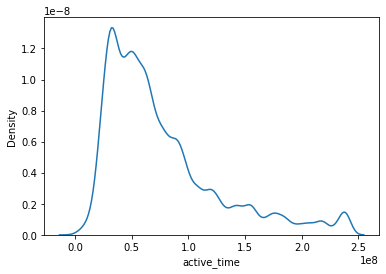

In [64]:
sns.kdeplot(train['active_time'])

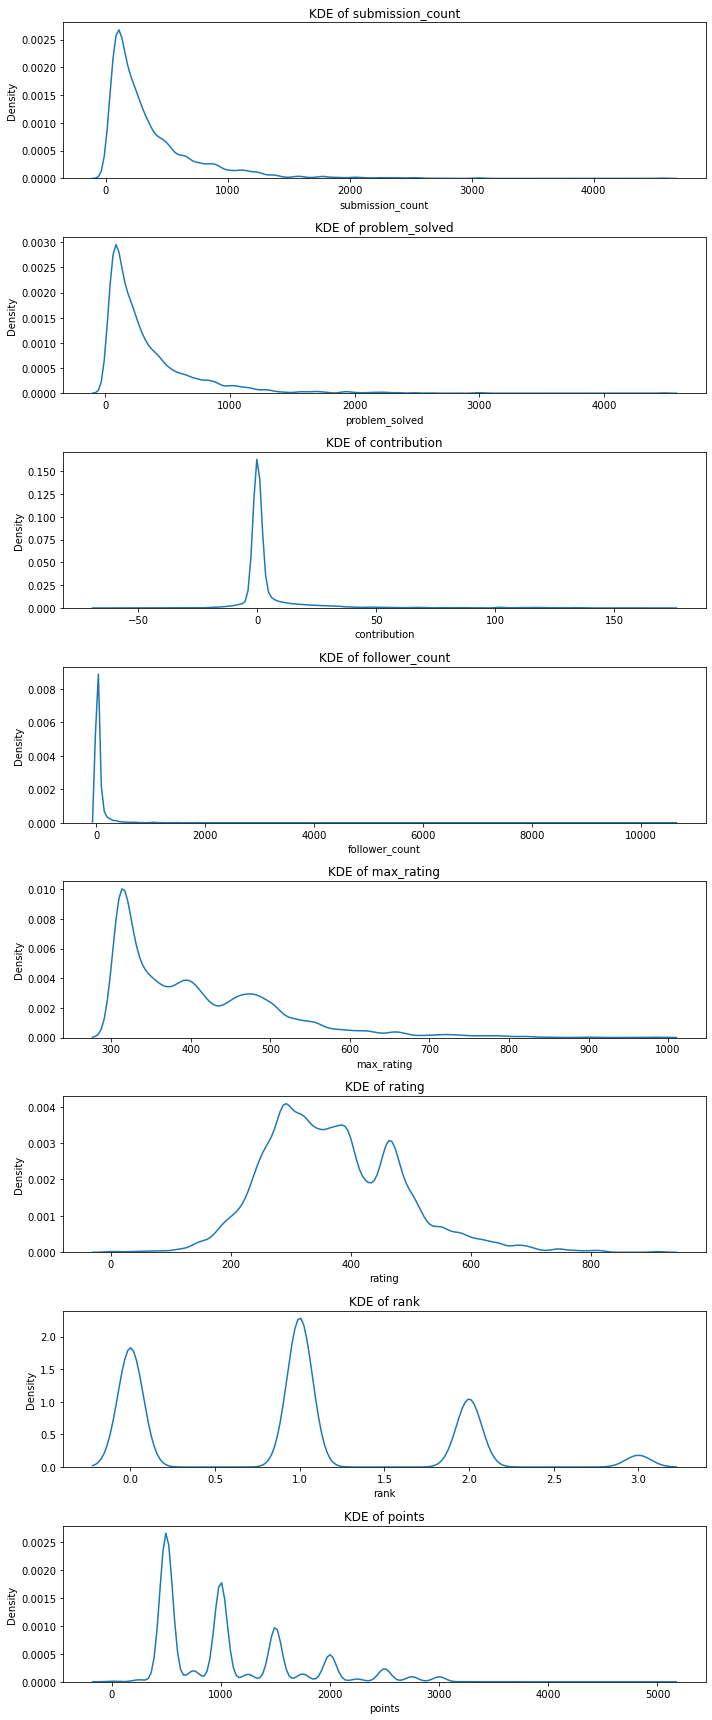

In [65]:

# List of columns for which you we to plot KDE
columns_to_plot = [
     'submission_count', 'problem_solved', 'contribution',
    'follower_count', 'max_rating', 'rating', 'rank', 'points'
    # Add other columns as needed
]

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, len(columns_to_plot) * 3))

# Plot KDE for each column
for i, column in enumerate(columns_to_plot):
    if column in train.columns:
        sns.kdeplot(train[column].dropna(), ax=axes[i])
        axes[i].set_title(f'KDE of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Density')
    else:
        print(f"Column '{column}' not found in the DataFrame.")

plt.tight_layout()
plt.show()




In [66]:
# train.describe()

In [67]:
# train.corr()

In [68]:

train.head()

,user_id,problem_id,attempts_range,submission_count,problem_solved,contribution,follower_count,max_rating,rating,rank,...,country_Trinidad and Tobago,country_Tunisia,country_Turkmenistan,country_Ukraine,country_United Kingdom,country_United States,country_Uzbekistan,country_Venezuela,country_Vietnam,active_time
0,232,6507,1,53,47,0,1,307.913,206.709,0.0,...,0,0,0,0,0,0,0,0,0,71522843
1,3568,2994,3,133,118,0,0,324.255,235.378,0.0,...,0,0,0,0,0,0,0,0,0,47535708
2,1600,5071,1,50,44,0,7,343.177,229.358,0.0,...,0,0,0,0,0,0,0,0,0,31228669
3,2256,703,1,271,233,23,40,436.927,399.083,1.0,...,0,0,0,0,0,0,0,0,0,57438471
4,2321,356,1,155,135,0,80,492.546,472.190,2.0,...,0,0,0,0,0,0,0,0,0,67697192


In [69]:
test.head()

,ID,user_id,problem_id,submission_count,problem_solved,contribution,follower_count,max_rating,rating,rank,...,country_Trinidad and Tobago,country_Tunisia,country_Turkmenistan,country_Ukraine,country_United Kingdom,country_United States,country_Uzbekistan,country_Venezuela,country_Vietnam,active_time
0,user_856_prob_5822,856,5822,274,231,0,35,393.062,362.959,1.0,...,0,0,0,0,0,0,0,0,0,81070769
1,user_2642_prob_2334,2642,2334,124,114,0,8,307.053,146.502,0.0,...,0,0,0,0,0,0,0,0,0,65576834
2,user_2557_prob_2920,2557,2920,367,283,0,76,321.674,241.399,0.0,...,0,0,0,0,0,0,0,0,0,109419135
3,user_1572_prob_4598,1572,4598,203,181,0,29,473.050,454.989,1.0,...,0,0,0,0,0,0,0,0,0,81386750
4,user_295_prob_6139,295,6139,113,89,0,3,455.275,448.108,1.0,...,0,0,0,0,0,0,0,0,0,40284363


In [70]:
# train_data['solve_rate'] = train_data['problem_solved'] / train_data['submission_count']
# train_data['active_time'] = train_data['last_online_time_seconds'] - train_data['registration_time_seconds']
# test_data['solve_rate'] = test_data['problem_solved'] / test_data['submission_count']
# test_data['active_time'] = test_data['last_online_time_seconds'] - test_data['registration_time_seconds']


In [71]:
from sklearn.model_selection import train_test_split

X = train.drop(['attempts_range',], axis=1)
y = train['attempts_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [72]:
X_train


,user_id,problem_id,submission_count,problem_solved,contribution,follower_count,max_rating,rating,rank,points,...,country_Trinidad and Tobago,country_Tunisia,country_Turkmenistan,country_Ukraine,country_United Kingdom,country_United States,country_Uzbekistan,country_Venezuela,country_Vietnam,active_time
151683,236,1167,106,98,0,4,323.108,279.243,0.0,250.0,...,0,0,0,0,0,0,0,0,0,146552682
4111,224,374,339,275,0,43,326.548,248.853,0.0,1500.0,...,0,0,0,0,0,0,0,0,0,62605580
127698,2309,3354,215,178,31,44,353.211,353.211,1.0,500.0,...,0,0,0,0,0,0,0,0,0,36903785
108275,3275,583,147,115,0,29,343.463,305.619,0.0,1000.0,...,0,0,0,0,0,0,0,0,0,55119326
19079,810,2218,1605,1600,0,443,543.865,543.865,2.0,1250.0,...,0,0,0,0,0,0,0,0,0,88292754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,2196,5731,239,205,0,7,315.367,199.828,0.0,500.0,...,0,0,0,0,0,0,0,0,0,124934881
103694,92,3243,256,248,2,30,404.243,377.007,1.0,2000.0,...,0,0,0,0,0,0,0,0,0,35582936
131932,1165,583,134,117,0,43,562.787,562.787,2.0,1000.0,...,0,0,0,0,0,0,0,0,0,37935705
146867,373,509,749,682,0,87,459.002,437.500,1.0,2750.0,...,0,0,0,0,0,0,0,0,0,187900570


# Feature Scaling

In [73]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## StandardScaling to 'active_time' colume as it is normally distributed

In [74]:
scaler=StandardScaler()
column_to_scale=['active_time']
X_train[column_to_scale]=scaler.fit_transform(X_train[column_to_scale])
X_test[column_to_scale]=scaler.transform(X_test[column_to_scale])
test[column_to_scale]=scaler.transform(test[column_to_scale])

## MinMaxScaling on rest of the columns 

In [75]:
scaler1=MinMaxScaler()
column_to_scale1=['submission_count','problem_solved','contribution','follower_count','max_rating','rating','rank','points','active_time']
X_train[column_to_scale1]=scaler1.fit_transform(X_train[column_to_scale1])
X_test[column_to_scale1]=scaler1.transform(X_test[column_to_scale1])
test[column_to_scale1]=scaler1.transform(test[column_to_scale1])

In [76]:
train.head()

,user_id,problem_id,attempts_range,submission_count,problem_solved,contribution,follower_count,max_rating,rating,rank,...,country_Trinidad and Tobago,country_Tunisia,country_Turkmenistan,country_Ukraine,country_United Kingdom,country_United States,country_Uzbekistan,country_Venezuela,country_Vietnam,active_time
0,232,6507,1,53,47,0,1,307.913,206.709,0.0,...,0,0,0,0,0,0,0,0,0,71522843
1,3568,2994,3,133,118,0,0,324.255,235.378,0.0,...,0,0,0,0,0,0,0,0,0,47535708
2,1600,5071,1,50,44,0,7,343.177,229.358,0.0,...,0,0,0,0,0,0,0,0,0,31228669
3,2256,703,1,271,233,23,40,436.927,399.083,1.0,...,0,0,0,0,0,0,0,0,0,57438471
4,2321,356,1,155,135,0,80,492.546,472.190,2.0,...,0,0,0,0,0,0,0,0,0,67697192


In [77]:
test.head()

,ID,user_id,problem_id,submission_count,problem_solved,contribution,follower_count,max_rating,rating,rank,...,country_Trinidad and Tobago,country_Tunisia,country_Turkmenistan,country_Ukraine,country_United Kingdom,country_United States,country_Uzbekistan,country_Venezuela,country_Vietnam,active_time
0,user_856_prob_5822,856,5822,0.059750,0.051397,0.27234,0.003310,0.131279,0.398364,0.333333,...,0,0,0,0,0,0,0,0,0,0.336681
1,user_2642_prob_2334,2642,2334,0.026921,0.025251,0.27234,0.000757,0.004644,0.160793,0.000000,...,0,0,0,0,0,0,0,0,0,0.272330
2,user_2557_prob_2920,2557,2920,0.080105,0.063017,0.27234,0.007187,0.026171,0.264946,0.000000,...,0,0,0,0,0,0,0,0,0,0.454419
3,user_1572_prob_4598,1572,4598,0.044211,0.040223,0.27234,0.002742,0.249050,0.499371,0.333333,...,0,0,0,0,0,0,0,0,0,0.337993
4,user_295_prob_6139,295,6139,0.024513,0.019665,0.27234,0.000284,0.222879,0.491819,0.333333,...,0,0,0,0,0,0,0,0,0,0.167283


<AxesSubplot:xlabel='active_time', ylabel='Density'>

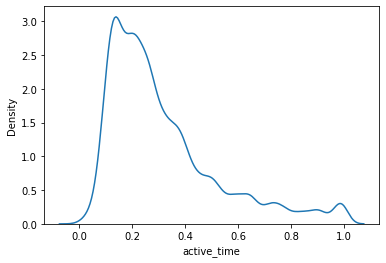

In [78]:
sns.kdeplot(X_test['active_time'])

# Changing the datatypes of the features in order to save the memory

In [79]:
# Optimize data types
for col in X_train.columns:
    if X_train[col].dtype == 'int64':
        X_train[col] = X_train[col].astype('int32')
    elif X_train[col].dtype == 'float64':
        X_train[col] = X_train[col].astype('float32')

# Apply the same optimization to the test set
for col in X_test.columns:
    if X_test[col].dtype == 'int64':
        X_test[col] = X_test[col].astype('int32')
    elif X_test[col].dtype == 'float64':
        X_test[col] = X_test[col].astype('float32')


# Applying Random Forest Algorithm

In [80]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=150,random_state=20)

model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=150, random_state=20)

In [81]:
# Predict on the validation set
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score

# Evaluate the model
f1 = f1_score(y_test,y_pred, average='weighted')
print(f'Weighted F1 Score: {f1}')

Weighted F1 Score: 0.4637949100198387


# Applying KNN Model

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
from sklearn.metrics import f1_score

# Evaluate the model
f1 = f1_score(y_test,y_pred, average='weighted')
print(f'Weighted F1 Score: {f1}')

Weighted F1 Score: 0.4305674908022661


# Applying Random Forest on Test data for submission

In [83]:
# test_data['ID'] = test_submission['user_id'].astype(str) + '_' + test_submission['problem_id'].astype(str)
test_features = test.drop(['ID'], axis=1)
test_predictions = model.predict(test_features)
             
submission = pd.DataFrame({'ID': test_data['ID'],'attempts_range': test_predictions})


In [84]:
submission.isnull().sum()

ID                0
attempts_range    0
dtype: int64

In [85]:
submission.to_csv('test_predictions.csv', index=False)
